In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import os
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [8]:
df= pd.read_csv('data.csv')
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


## EDA 
### removal of extra columns
### dropping Null values
### checking size and shapes of data
### visualizations

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [11]:
df.drop('URLs', inplace= True, axis= 1)
df.dropna(inplace= True)
df

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...
4003,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4007,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [12]:
## Shape and size after dropping null value and extra columns:

df.shape, df.size

((3988, 3), 11964)

Text(0.5, 1.0, 'Fake Vs Real news')

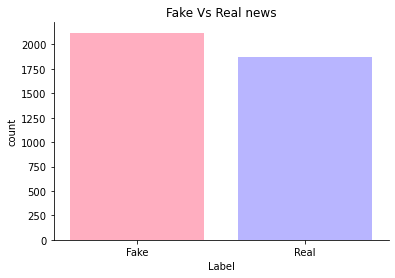

In [14]:
sns.countplot(x='Label', 
              data=df,
              palette=['#ffaec0', '#b8b5ff'],
              saturation=1)
sns.despine()
plt.xticks([0,1], ['Fake', 'Real'])
plt.title('Fake Vs Real news')

In [15]:
### Count of real and fake values::

df.Label.value_counts()

0    2120
1    1868
Name: Label, dtype: int64

## text cleaning and analysis

In [16]:
### we need a target ie will be our headline + body text

df['Text']= df['Headline']+ ' ' + df['Body']

In [17]:
df['Length']=df['Text'].apply(len)

In [18]:
df.head()

,Headline,Body,Label,Text,Length
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald Trump Ima...,6455
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...,3392
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...,6641
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...,699
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tribute Co...,257


In [19]:
df.groupby('Label').describe()

Length                                                             \
        count         mean          std    min      25%     50%      75%   
Label                                                                      
0      2120.0  2457.573585  2989.973011  110.0   260.75  1598.5  3539.25   
1      1868.0  3620.605460  3057.972872  120.0  1561.50  2912.0  5064.00   

                
           max  
Label           
0      32859.0  
1      32811.0

<AxesSubplot:ylabel='Frequency'>

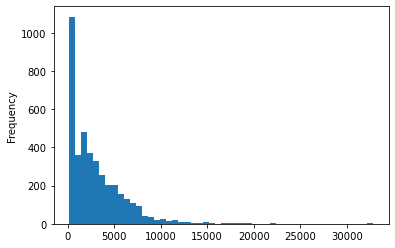

In [20]:
df['Length'].plot(bins=50, kind= 'hist')

In [21]:
df.head()

,Headline,Body,Label,Text,Length
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald Trump Ima...,6455
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...,3392
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...,6641
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...,699
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tribute Co...,257


In [22]:
to_drop= ['Headline', 'Body', 'Length']
df.drop(to_drop, axis= 1, inplace= True)
df.head(10)

,Label,Text
0,1,Four ways Bob Corker skewered Donald Trump Ima...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tribute Co...
5,0,JetNation FanDuel League; Week 4 JetNation Fan...
6,1,Kansas Tried a Tax Plan Similar to Trump’s. It...
7,1,"India RBI chief: growth important, but not at ..."
8,1,EPA chief to sign rule on Clean Power Plan exi...
9,1,Talks on sale of Air Berlin planes to easyJet ...


### stopwords removal and Lemmatization

In [25]:
from nltk import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords


In [26]:
sw= stopwords.words('english')
extras= ["would"]
sw.append("would")
sw.append("could")
sw.append("one")
print(sw)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [28]:
lm = WordNetLemmatizer()
def clean_text(column):
    corpus = []
    for value in column:
        # convert each word into lower case
        value = value.lower()
        value = value.split()
        # lemmatizing those words which are not stop words
        value = [lm.lemmatize(word, pos="v") for word in value if word not in sw]
        corpus.append(' '.join(value))
    return corpus    

In [29]:
df['Text']= clean_text(df.Text)
df.Text[3]

NameError: name 'sw' is not defined

### Custom exploring

In [30]:
import re   # importing regular expression function
def clean_data(input):
    corpus=[]
    for value in input:
        value= value.lower()
        value= re.sub(r'[^\w\s]','', value)
        value= re.sub(r'[^a-zA-Z]',' ', value)
        value= re.sub('aa[a]*','a', value)
        value= re.sub(r"http\S+", "", value)
        value = re.sub(r'\<a href', ' ', value)
        value = re.sub(r'[_"\;%()|+&=*%.,!?:#$@\[\]/]', ' ', value)
        value= re.sub('-', ' ', value)
        value= re.sub('\d+', '', value)
        value= re.sub('\s\s+',' ', value)
        value= re.sub('\n', '', value)
        value= re.sub('<[^>]*>', '', value)
        corpus.append(''.join(value))
    return corpus


In [31]:
df['Text']=clean_data(df.Text)
df.Text[3]

'egypts cheiron wins tieup with pemex for mexican onshore oil field mexico city reuters egypts cheiron holdings limited won the rights to partner with mexican national oil company pemex on its onshore cardenasmora project the industry regulator said on wednesday the tieup marks only the second joint venture between the pemex and a equity partner since an energy opening finalized in ended the companys decadeslong monopoly and allowed it to develop projects with private and foreign oil companies cardenasmora is a squaremile sq km field located in tabasco state believed to contain million barrels of oil equivalent boe in proven probable and possible reserves'

### WORD CLOUD

In [32]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
fake_news = df[df.Label == 0]
real_news = df[df.Label == 1]

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# wordcloud for fake news
fake_wc = WordCloud(width = 600, height = 400, 
                    background_color ='black', 
                    stopwords = stopwords.words('english'), 
                    min_font_size = 10).generate(' '.join(fake_news.Text)) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(fake_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for fake news', fontsize=20);

In [ ]:
# wordcloud for REAL news
real_wc = WordCloud(width = 600, height = 400, 
                    background_color ='black', 
                    stopwords = stopwords.words('english'), 
                    min_font_size = 10).generate(' '.join(real_news.Text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(real_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for real news', fontsize=20);

## Train-Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test)= train_test_split(df['Text'], df['Label'], test_size= 0.33, random_state= 0, stratify=df['Label'])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X_train_cv= cv.fit_transform(X_train)
X_test_cv= cv.transform(X_test)

### getting feature values and feature names

In [ ]:
cv.get_feature_names()

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle
Log_Reg=LogisticRegression(solver='liblinear',random_state=0)

In [ ]:
model= Log_Reg.fit(X_train_cv, y_train)


In [ ]:
with open('pickled_1', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('pickled_1', 'rb') as f:
    LR= pickle.load(f)

In [ ]:
LR.predict(X_test_cv)

In [ ]:
###filename= 'LR_bow.sav'

In [ ]:
##pickle.dump(model, open(filename, 'wb'))

 
# some time later...
 
# load the model from disk
##loaded_model = pickle.load(open(filename, 'rb'))
##result = loaded_model.score(X_test, y_test)
##print(result)

In [ ]:
y_predicted= Log_Reg.predict(X_test_cv)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_predicted)

In [ ]:
accuracy_score(y_test, y_predicted)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
print('Test score with Logistic regression is', accuracy_score(y_test, y_predicted))

## DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc= DecisionTreeClassifier(criterion= 'entropy')

In [ ]:
model= Dtc.fit(X_train_cv, y_train)
model.predict(X_test_cv)

In [ ]:
y_pred= model.predict(X_test_cv)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
accuracy_score(y_test, y_pred)

## NAIVE BAYES APPROACH

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBmodel= MultinomialNB()

In [ ]:
model3=NBmodel.fit(X_train_cv, y_train)

In [ ]:
y_predNB=model3.predict(X_test_cv)

In [ ]:
all_predictions=NBmodel.predict(X_test_cv)
all_predictions

In [ ]:
confusion_matrix(y_test, y_predNB)

In [ ]:
accuracy_score(y_test, y_predNB)

In [ ]:
print(classification_report(y_test, y_predNB))

## TF-IDF VECTORIZATION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
features= cv.get_feature_names()
features

In [ ]:
X_train_tfidf= tfidf.fit_transform(X_train).toarray()
df_tfidf= pd.DataFrame(X_train_tfidf, columns= features)
print(round(df_tfidf, ndigits=2))
X_test_tfidf= tfidf.transform(X_test)

In [ ]:
y= df.Label.values

In [ ]:
X_train_tfidf.shape, X_test_tfidf.shape, y_train.shape, y_test.shape

## Logistic regression using TFIDF

In [ ]:
model= Log_Reg.fit(X_train_tfidf, y_train)

In [ ]:
y_pred=model.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
filename = 'pickled_2.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_tfidf, y_test)
print(result)

## TFIDF using Decision Tree Classifier

In [ ]:
model= Dtc.fit(X_train_tfidf, y_train)


In [ ]:
y_pred= model.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

## TFIDF Vectorizer with NAIVE BAYES Classifier

In [ ]:
model= NBmodel.fit(X_train_tfidf, y_train)
y_pred= model.predict(X_test_tfidf)
y_prediction= NBmodel.predict(X_test_tfidf)

In [ ]:
confusion_matrix(y_test, y_prediction)

In [ ]:
accuracy_score(y_test, y_prediction)

In [ ]:
print(classification_report(y_test, y_prediction))

## BEST MODEL TO BE CONSIDERED ON BASIS OF ACCURACY SCORE IS Bag of words with Logistic regressor giving an accuracy of 97.03%

In [ ]:
## vest pipeline will be 

Log_Reg= LogisticRegression()
model= Log_Reg.fit(X_train_cv, y_train)
model.predict(X_test_cv)

In [ ]:
accuracy_score(y_test, y_predicted)

## Best model pickle

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
corpus= df['Text']
X_train= cv.fit_transform(X_train)


In [ ]:
model= Log_Reg.fit(X_train, y_train)

In [ ]:
with open('Log_reg.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('bow.sav', 'wb') as f:
    pickle.dump(cv,f)